In [30]:
# import requirement libraries and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import yfinance as yf
import torch.nn as nn
import torch.functional as F
# from mpl_finance import candlestick_ohlc
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader


In [3]:
# create a ticker object for Google (GOOGL)
ticker = yf.Ticker("GOOG")

# Define the start and end dates
start_date = "2016-06-14"
end_date = "2023-05-17"

# Get historical data for the specified date range
df = ticker.history(start=start_date, end=end_date)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,35.824001,36.123501,35.655998,35.913502,26122000,0.0,0.0
2016-06-15 00:00:00-04:00,35.950001,36.148998,35.865501,35.945999,24290000,0.0,0.0
2016-06-16 00:00:00-04:00,35.745499,35.832500,35.162998,35.518002,39650000,0.0,0.0
2016-06-17 00:00:00-04:00,35.432499,35.441002,34.422600,34.585999,68048000,0.0,0.0
2016-06-20 00:00:00-04:00,34.938499,35.124001,34.670502,34.685501,41650000,0.0,0.0


In [ ]:
# Prepare the data for the candlestick plot
ohlc = df[['Open', 'High', 'Low', 'Close']].reset_index().values

# Create the plot
fig, ax = plt.subplots()

# Plot candlestick chart
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Candlestick Chart')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [4]:
# Move column 'Close' to the first position
col_close = df.pop('Close')
df.insert(0, 'Close', col_close)
df.head()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,35.913502,35.824001,36.123501,35.655998,26122000,0.0,0.0
2016-06-15 00:00:00-04:00,35.945999,35.950001,36.148998,35.865501,24290000,0.0,0.0
2016-06-16 00:00:00-04:00,35.518002,35.745499,35.832500,35.162998,39650000,0.0,0.0
2016-06-17 00:00:00-04:00,34.585999,35.432499,35.441002,34.422600,68048000,0.0,0.0
2016-06-20 00:00:00-04:00,34.685501,34.938499,35.124001,34.670502,41650000,0.0,0.0


In [5]:
df.tail()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-10 00:00:00-04:00,112.279999,108.550003,113.510002,108.480003,47533500,0.0,0.0
2023-05-11 00:00:00-04:00,116.900002,115.860001,118.440002,114.930000,57115100,0.0,0.0
2023-05-12 00:00:00-04:00,117.919998,117.000000,118.260002,116.550003,31272500,0.0,0.0
2023-05-15 00:00:00-04:00,116.959999,116.489998,118.794998,116.480003,22107900,0.0,0.0
2023-05-16 00:00:00-04:00,120.089996,116.830002,121.199997,116.830002,32370100,0.0,0.0


In [6]:
df.shape

(1743, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1743 entries, 2016-06-14 00:00:00-04:00 to 2023-05-16 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1743 non-null   float64
 1   Open          1743 non-null   float64
 2   High          1743 non-null   float64
 3   Low           1743 non-null   float64
 4   Volume        1743 non-null   int64  
 5   Dividends     1743 non-null   float64
 6   Stock Splits  1743 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 108.9 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1743.0,7.715125e+01,3.251057e+01,3.341300e+01,5.240875e+01,6.313100e+01,1.030150e+02,1.507090e+02
Open,1743.0,7.709885e+01,3.251199e+01,3.355000e+01,5.244275e+01,6.300000e+01,1.029630e+02,1.518635e+02
High,1743.0,7.794531e+01,3.291364e+01,3.361500e+01,5.302875e+01,6.348000e+01,1.041453e+02,1.521000e+02
Low,1743.0,7.631672e+01,3.211888e+01,3.316420e+01,5.169025e+01,6.231900e+01,1.018575e+02,1.498875e+02
Volume,1743.0,3.075875e+07,1.348076e+07,6.936000e+06,2.219700e+07,2.724200e+07,3.471800e+07,1.241400e+08
Dividends,1743.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Stock Splits,1743.0,1.147447e-02,4.790505e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01


In [10]:
df.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Close,0
Open,0
High,0
Low,0
Volume,0
Dividends,0
Stock Splits,0


In [12]:
df.duplicated().sum()

0

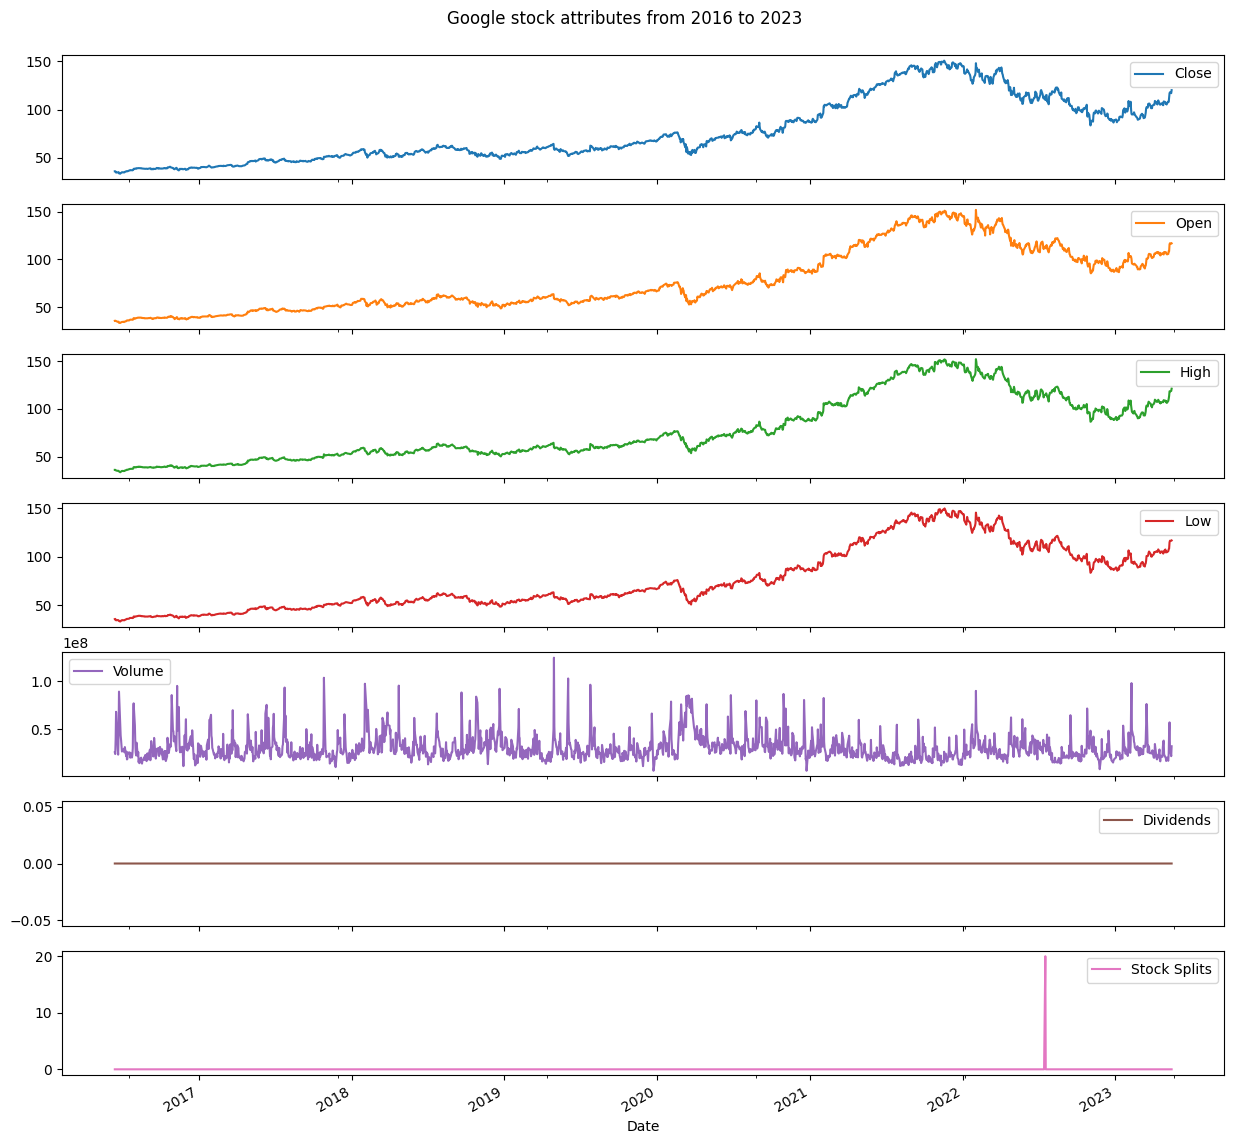

In [13]:
df.plot(subplots=True, figsize=(15, 15))
plt.suptitle('Google stock attributes from 2016 to 2023', y=0.91)
plt.show()

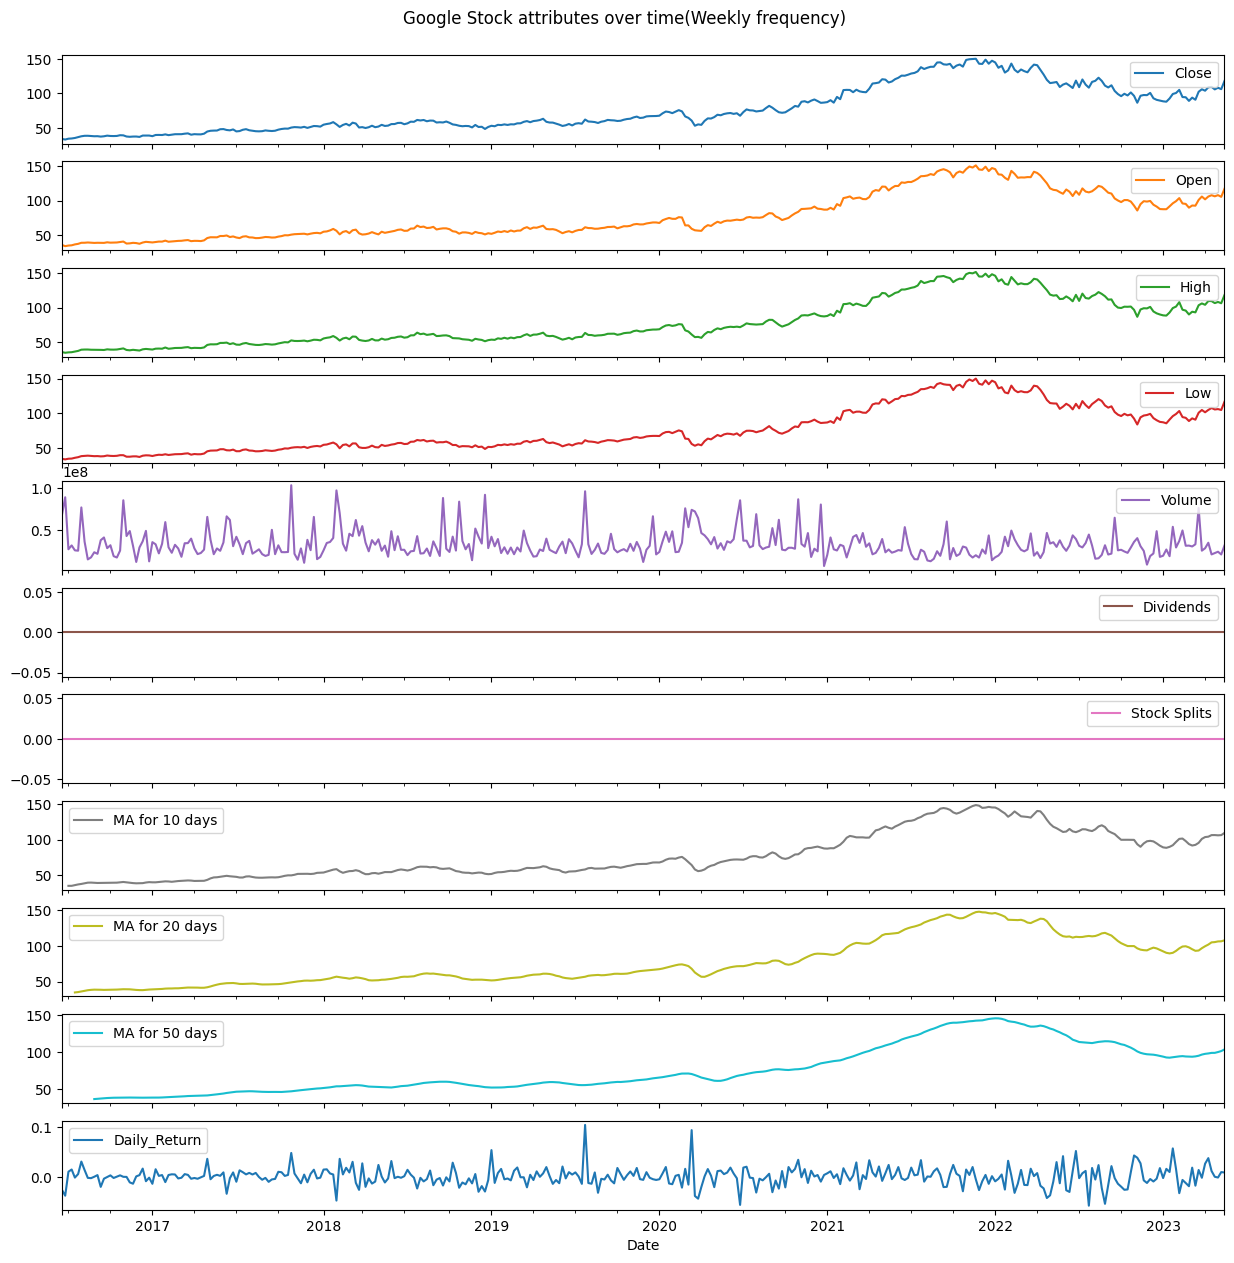

In [22]:
df.asfreq('W', method='ffill').plot(subplots=True, figsize=(15,15), style='-')
plt.suptitle('Google Stock attributes over time(Weekly frequency)', y=0.91)
plt.show()

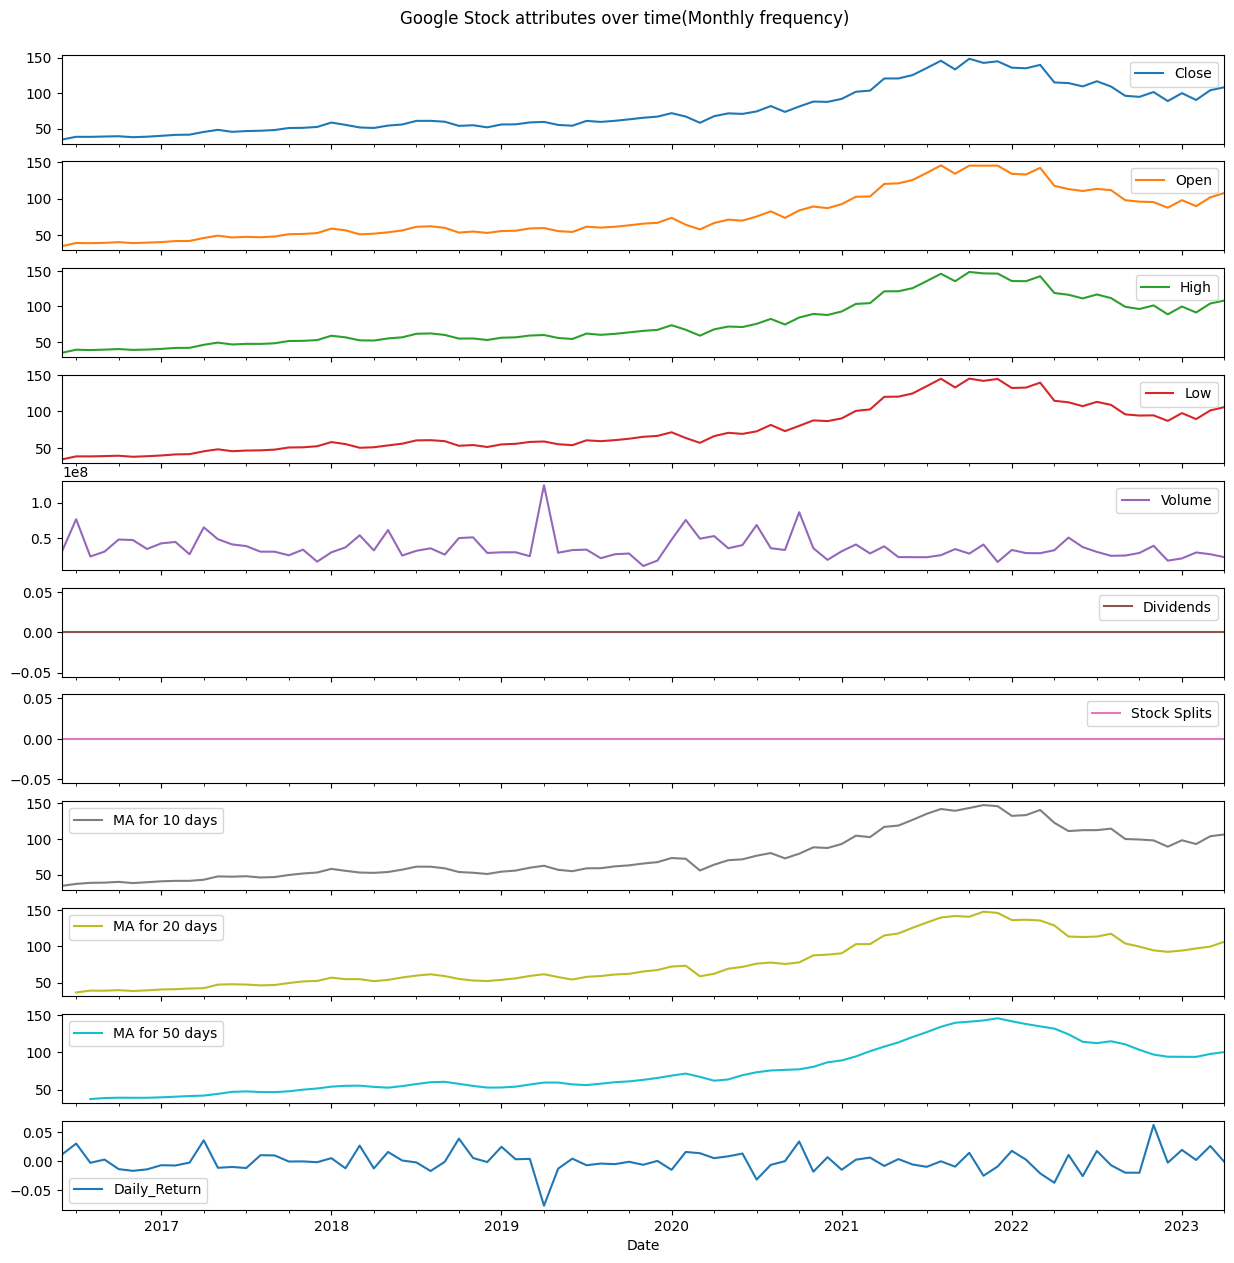

In [23]:
df.asfreq('M', method='ffill').plot(subplots=True, figsize=(15,15), style='-')
plt.suptitle('Google Stock attributes over time(Monthly frequency)', y=0.91)
plt.show()

In [19]:
df[['Close']]

,Close
Date,
2016-06-14 00:00:00-04:00,35.913502
2016-06-15 00:00:00-04:00,35.945999
2016-06-16 00:00:00-04:00,35.518002
2016-06-17 00:00:00-04:00,34.585999
2016-06-20 00:00:00-04:00,34.685501
...,...
2023-05-10 00:00:00-04:00,112.279999
2023-05-11 00:00:00-04:00,116.900002
2023-05-12 00:00:00-04:00,117.919998


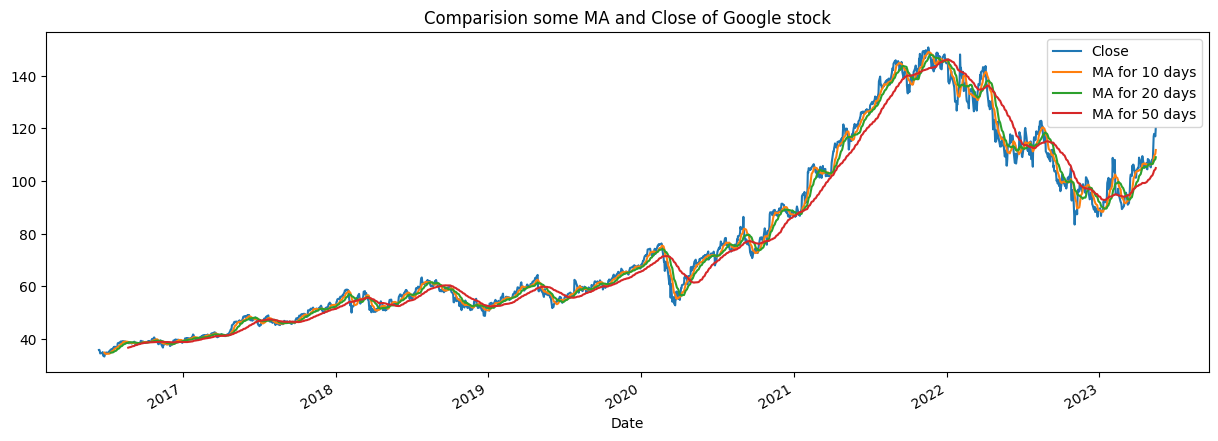

In [20]:
# computing moving average(ma)
ma_day = [10, 20, 50]

for ma in ma_day:
    col_name = f'MA for {ma} days'
    df[col_name] = df['Close'].rolling(ma).mean()

df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15,5))
plt.title('Comparision some MA and Close of Google stock')
plt.show()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

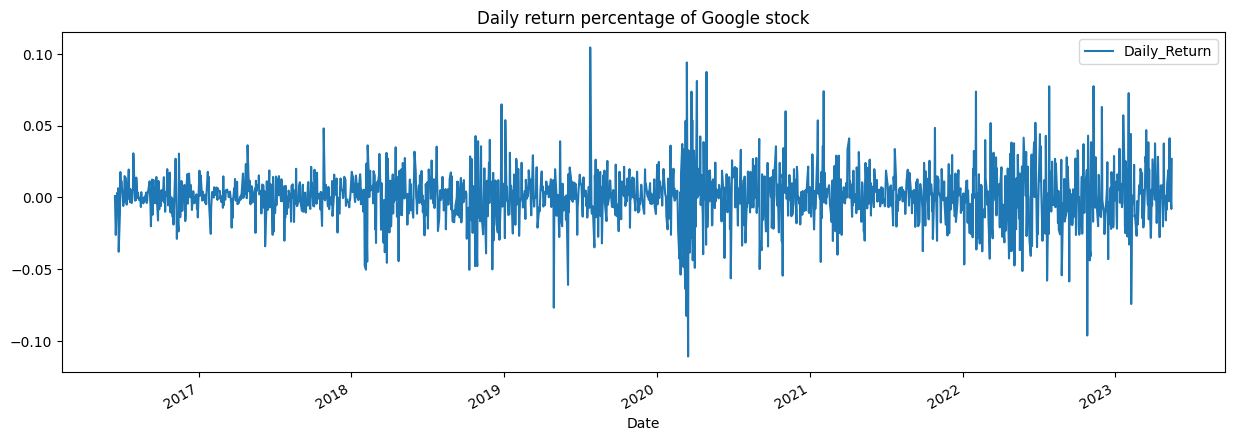

In [21]:
# use pct_change to find the percent change for each day
df['Daily_Return'] = df['Close'].pct_change()
# plot the daily return percentage
df.Daily_Return.plot(legend=True, figsize=(15,5))
plt.title('Daily return percentage of Google stock')
plt.show()

# Data Normalization
This is an important pre-processing step for neural networks:



In [38]:
# normalize data
scaler = MinMaxScaler()
df['Open'] = scaler.fit_transform(df.Open.values.reshape(-1,1))
df['High'] = scaler.fit_transform(df.High.values.reshape(-1,1))
df['Low'] = scaler.fit_transform(df.Low.values.reshape(-1,1))
df['Close'] = scaler.fit_transform(df.Close.values.reshape(-1,1))
data = df[['Open','Close','Low','High']].values
data.shape

(1743, 4)

In [39]:
data

array([[0.01922014, 0.02131789, 0.02134791, 0.02117145],
       [0.0202851 , 0.02159495, 0.02314278, 0.02138664],
       [0.01855663, 0.01794608, 0.01712425, 0.01871544],
       ...,
       [0.70532952, 0.72045934, 0.71438869, 0.7143942 ],
       [0.70101892, 0.71227493, 0.71378898, 0.71890951],
       [0.70389267, 0.73895953, 0.71678751, 0.73920743]])

# Preparing Data for Time Series
In order to prepare the dataset for stock price prediction, we need to frame it as a time series problem. We will use the price from the previous 9 days to predict the price on the next day. Let’s create the sequences accordingly:

In [40]:
seq_len=10
sequences=[]
for index in range(len(data) - seq_len): 
    sequences.append(data[index: index + seq_len])
sequences= np.array(sequences)

# Splitting the Data
We divide the entire dataset into three parts. 80% for the training set, 10% for the validation set and the remaining 10% for the test set

In [41]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

valid_set_size = int(np.round(valid_set_size_percentage/100*sequences.shape[0]))  
test_set_size  = int(np.round(test_set_size_percentage/100*sequences.shape[0]))
train_set_size = sequences.shape[0] - (valid_set_size + test_set_size)

x_train = sequences[:train_set_size,:-1,:]
y_train = sequences[:train_set_size,-1,:]
    
x_valid = sequences[train_set_size:train_set_size+valid_set_size,:-1,:]
y_valid = sequences[train_set_size:train_set_size+valid_set_size,-1,:]
    
x_test = sequences[train_set_size+valid_set_size:,:-1,:]
y_test = sequences[train_set_size+valid_set_size:,-1,:]

# Creating Data Loaders
Next, we define the data loaders to load the dataset in batches:

In [42]:
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

x_valid = torch.tensor(x_valid).float()
y_valid = torch.tensor(y_valid).float()

train_dataset = TensorDataset(x_train,y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

valid_dataset = TensorDataset(x_valid,y_valid)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Defining Model Architecture
We will define the model architecture. As it’s a time series problem, we will use Long Short-term Memory (LSTM) to capture the sequential information:

In [44]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.lstm  = nn.LSTM(4,64,batch_first=True)
        self.fc    = nn.Linear(64,4)
        
    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.fc(hidden)
        return x

model = NeuralNetwork()

#push to cuda if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
# model = model.to(device)

We also need to define the optimizer and loss:

In [45]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
mse = nn.MSELoss()

# Model Training
First, we define the forward and backward pass for training the neural network:

In [46]:
def train(dataloader):
    epoch_loss = 0
    model.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

Now, let us define only the forward pass for evaluating the model performance:


In [47]:
def evaluate(dataloader):
    epoch_loss = 0
    model.eval()  
    
    with torch.no_grad():
      for batch in dataloader:   
          x,y= batch
          pred = model(x)
          loss = mse(pred[0],y)              
          epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

Let’s train the model for 50 epochs. We will also save the best model during training based on the validation loss.



In [48]:
n_epochs = 50
best_valid_loss = float('inf')

for epoch in range(n_epochs):

    train_loss = train(train_dataloader)
    valid_loss = evaluate(valid_dataloader)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model, 'saved_weights.pt')

    print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss:.5f}')
    print(f'\tVal Loss: {valid_loss:.5f}\n')

Epoch  1
	Train Loss: 0.21208
	Val Loss: 0.02984

Epoch  2
	Train Loss: 3.01306
	Val Loss: 0.04272

Epoch  3
	Train Loss: 1.20594
	Val Loss: 0.00642

Epoch  4
	Train Loss: 0.42065
	Val Loss: 0.00435

Epoch  5
	Train Loss: 0.08659
	Val Loss: 0.00567

Epoch  6
	Train Loss: 0.10811
	Val Loss: 0.00106

Epoch  7
	Train Loss: 0.02495
	Val Loss: 0.00214

Epoch  8
	Train Loss: 0.03484
	Val Loss: 0.00112

Epoch  9
	Train Loss: 0.01818
	Val Loss: 0.00122

Epoch  10
	Train Loss: 0.01999
	Val Loss: 0.00102

Epoch  11
	Train Loss: 0.01718
	Val Loss: 0.00101

Epoch  12
	Train Loss: 0.01793
	Val Loss: 0.00104

Epoch  13
	Train Loss: 0.01807
	Val Loss: 0.00106

Epoch  14
	Train Loss: 0.01878
	Val Loss: 0.00108

Epoch  15
	Train Loss: 0.01942
	Val Loss: 0.00108

Epoch  16
	Train Loss: 0.01986
	Val Loss: 0.00109

Epoch  17
	Train Loss: 0.01993
	Val Loss: 0.00110

Epoch  18
	Train Loss: 0.01965
	Val Loss: 0.00113

Epoch  19
	Train Loss: 0.01919
	Val Loss: 0.00119

Epoch  20
	Train Loss: 0.01880
	Val Loss

# Model Inference
We are ready to make some predictions. First, we load the best model:

In [49]:
model=torch.load('saved_weights.pt')

Let’s make predictions on the test set:

In [50]:
x_test= torch.tensor(x_test).float()

with torch.no_grad():
  y_test_pred = model(x_test)

y_test_pred = y_test_pred.numpy()[0]

Finally, we visualize the predictions and compare them with the ground truth:

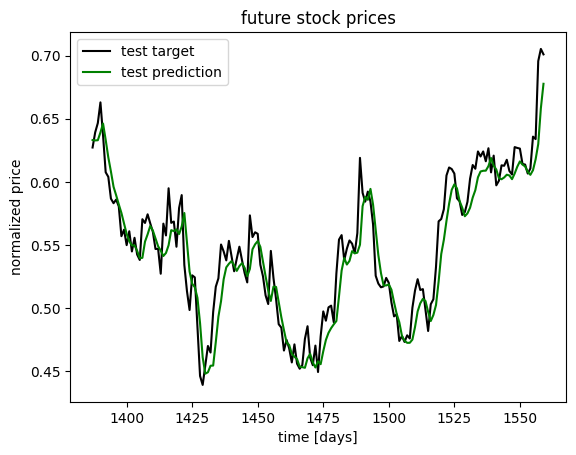

In [51]:
idx=0
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,idx], color='black', label='test target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,idx], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')